# Background

background information

# Data discription

data discription

# Pro-processing

Import the necessary methods

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Create the crime dateframe based on our date file. 

In [2]:
crime = pd.read_csv("Crime_data_from_2010_to_present.csv")

Check the column labels of the date file.

In [3]:
crime.columns.values

array(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2',
       'Crime Code 3', 'Crime Code 4', 'Address', 'Cross Street',
       'Location '], dtype=object)

Create the normalize function to help us normalize the date.

In [4]:
def datenormalize(string):
    string = string.replace('/','')
    return string

Normalize all the date information in the dateframe

In [5]:
crime['Date Reported'] = crime['Date Reported'].apply(datenormalize)
crime['Date Occurred'] = crime['Date Occurred'].apply(datenormalize)

In [6]:
crime['Crime Code Description'].value_counts()

BATTERY - SIMPLE ASSAULT                                    173280
BURGLARY FROM VEHICLE                                       147039
VEHICLE - STOLEN                                            146026
BURGLARY                                                    136156
THEFT PLAIN - PETTY ($950 & UNDER)                          135616
THEFT OF IDENTITY                                           117045
INTIMATE PARTNER - SIMPLE ASSAULT                           103455
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      97724
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     83513
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               82756
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              79144
ROBBERY                                                      76218
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     67138
CRIMINAL THREATS - NO WEAPON DISPLAYED                       52025
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     4

In [7]:
crime = crime.drop(columns = ['DR Number', 'Date Reported', 'Reporting District', 'Crime Code', 'Premise Code', 'Premise Description', 'Weapon Used Code', 'MO Codes', 'Weapon Description', 'Status Code', 'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Cross Street'])



In [8]:
crime = crime.sort_values(by= ['Date Occurred'])

In [9]:
crime.shape

(1910587, 10)

In [10]:
crime = crime.dropna()

In [11]:
crime.shape

(1360435, 10)

In [26]:
def combine_year(string):
    if '2010' in string:
        string = '2010'
    elif '2011' in string:
        string = '2011'
    elif '2012' in string:
        string = '2012'
    elif '2013' in string:
        string = '2013'
    elif '2014' in string:
        string = '2014'
    elif '2015' in string:
        string = '2015'
    elif '2016' in string:
        string = '2016'
    elif '2017' in string:
        string = '2017'
    elif '2018' in string:
        string = '2018'
    elif '2019' in string:
        string = '2019'
    return string

In [32]:
temp_table = crime
temp_table['Date Occurred'] = temp_table['Date Occurred'].apply(combine_year)

In [33]:
temp_table.groupby(['Date Occurred', 'Crime Code Description']).size()

Date Occurred  Crime Code Description                                  
2010           ARSON                                                         331
               ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                  158
               ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               8346
               ATTEMPTED ROBBERY                                            1363
               BATTERY - SIMPLE ASSAULT                                    20515
               BATTERY ON A FIREFIGHTER                                       13
               BATTERY POLICE (SIMPLE)                                       460
               BATTERY WITH SEXUAL CONTACT                                  1031
               BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM        2
               BIGAMY                                                          2
               BIKE - STOLEN                                                 164
               BOMB SCARE            

In [35]:
crime_type = temp_table['Crime Code Description'].unique().tolist()

In [56]:
crime_type.append("YEAR")

['CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'THEFT OF IDENTITY', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH', 'BATTERY - SIMPLE ASSAULT', 'BATTERY WITH SEXUAL CONTACT', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'RAPE, FORCIBLE', 'ORAL COPULATION', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'CHILD NEGLECT (SEE 300 W.I.C.)', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 'OTHER MISCELLANEOUS CRIME', 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 'CHILD ANNOYING (17YRS & UNDER)', 'PIMPING', 'LEWD/LASCIVIOUS ACTS WITH CHILD', 'BURGLARY', 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'BURGLARY FROM VEHICLE', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 'RAPE, ATTEMPTED', 'INTIMATE PARTNER - SIMPLE ASSAULT', 'BRANDISH WEAPON', 'STALKING', 'VIOLATION OF COURT ORDER', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'DOCUMENT FORGERY / STOLEN FELONY', 'DISTURBING THE PEACE', 'ASSAULT WITH DEADLY WEAPON,

In [57]:
yearly_crime = pd.DataFrame(columns = crime_type)

In [58]:
yearly_crime

,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),SEXUAL PENETRATION W/FOREIGN OBJECT,THEFT OF IDENTITY,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH,BATTERY - SIMPLE ASSAULT,BATTERY WITH SEXUAL CONTACT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD","RAPE, FORCIBLE",ORAL COPULATION,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,GRAND THEFT / AUTO REPAIR,ABORTION/ILLEGAL,INCITING A RIOT,BLOCKING DOOR INDUCTION CENTER,FAILURE TO DISPERSE,"MANSLAUGHTER, NEGLIGENT",TILL TAP - ATTEMPT,BOAT - STOLEN,DRUNK ROLL - ATTEMPT,YEAR


In [62]:
for i in range(0, 10):
    temp = temp_table[temp_table['Date Occurred'] == str(i + 2010)]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(str(i + 2010))
    yearly_crime.loc[i] = crime_count
    

In [63]:
yearly_crime

,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),SEXUAL PENETRATION W/FOREIGN OBJECT,THEFT OF IDENTITY,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH,BATTERY - SIMPLE ASSAULT,BATTERY WITH SEXUAL CONTACT,"LETTERS, LEWD - TELEPHONE CALLS, LEWD","RAPE, FORCIBLE",ORAL COPULATION,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,GRAND THEFT / AUTO REPAIR,ABORTION/ILLEGAL,INCITING A RIOT,BLOCKING DOOR INDUCTION CENTER,FAILURE TO DISPERSE,"MANSLAUGHTER, NEGLIGENT",TILL TAP - ATTEMPT,BOAT - STOLEN,DRUNK ROLL - ATTEMPT,YEAR
0,1205,124,13107,127,20515,1031,2753,879,136,1086,...,1,0,2,0,0,1,2,0,1,2010
1,1107,120,13302,109,19893,1016,2591,794,113,844,...,3,0,0,0,5,0,0,1,0,2011
2,1086,129,15141,124,20290,1084,2564,931,156,973,...,2,0,0,0,2,0,0,0,0,2012
3,871,143,12892,94,18813,929,1984,792,131,819,...,2,3,4,0,3,0,0,0,0,2013
4,657,209,12155,132,18293,1066,1916,961,172,791,...,2,0,0,0,6,0,0,0,0,2014
5,574,277,14111,150,17470,1034,1807,1085,176,790,...,1,0,2,0,2,1,0,0,0,2015
6,511,314,12003,146,17784,1070,1600,1063,215,914,...,0,0,0,2,0,1,0,0,0,2016
7,96,78,2493,39,4557,265,362,272,42,220,...,0,0,0,0,0,0,0,0,0,2017
8,27,23,190,4,465,54,69,63,6,23,...,0,0,0,0,0,0,0,0,0,2018
9,9,12,263,4,833,50,79,28,8,18,...,0,0,0,0,0,0,0,0,0,2019


In [64]:
crime_type.pop()

'YEAR'

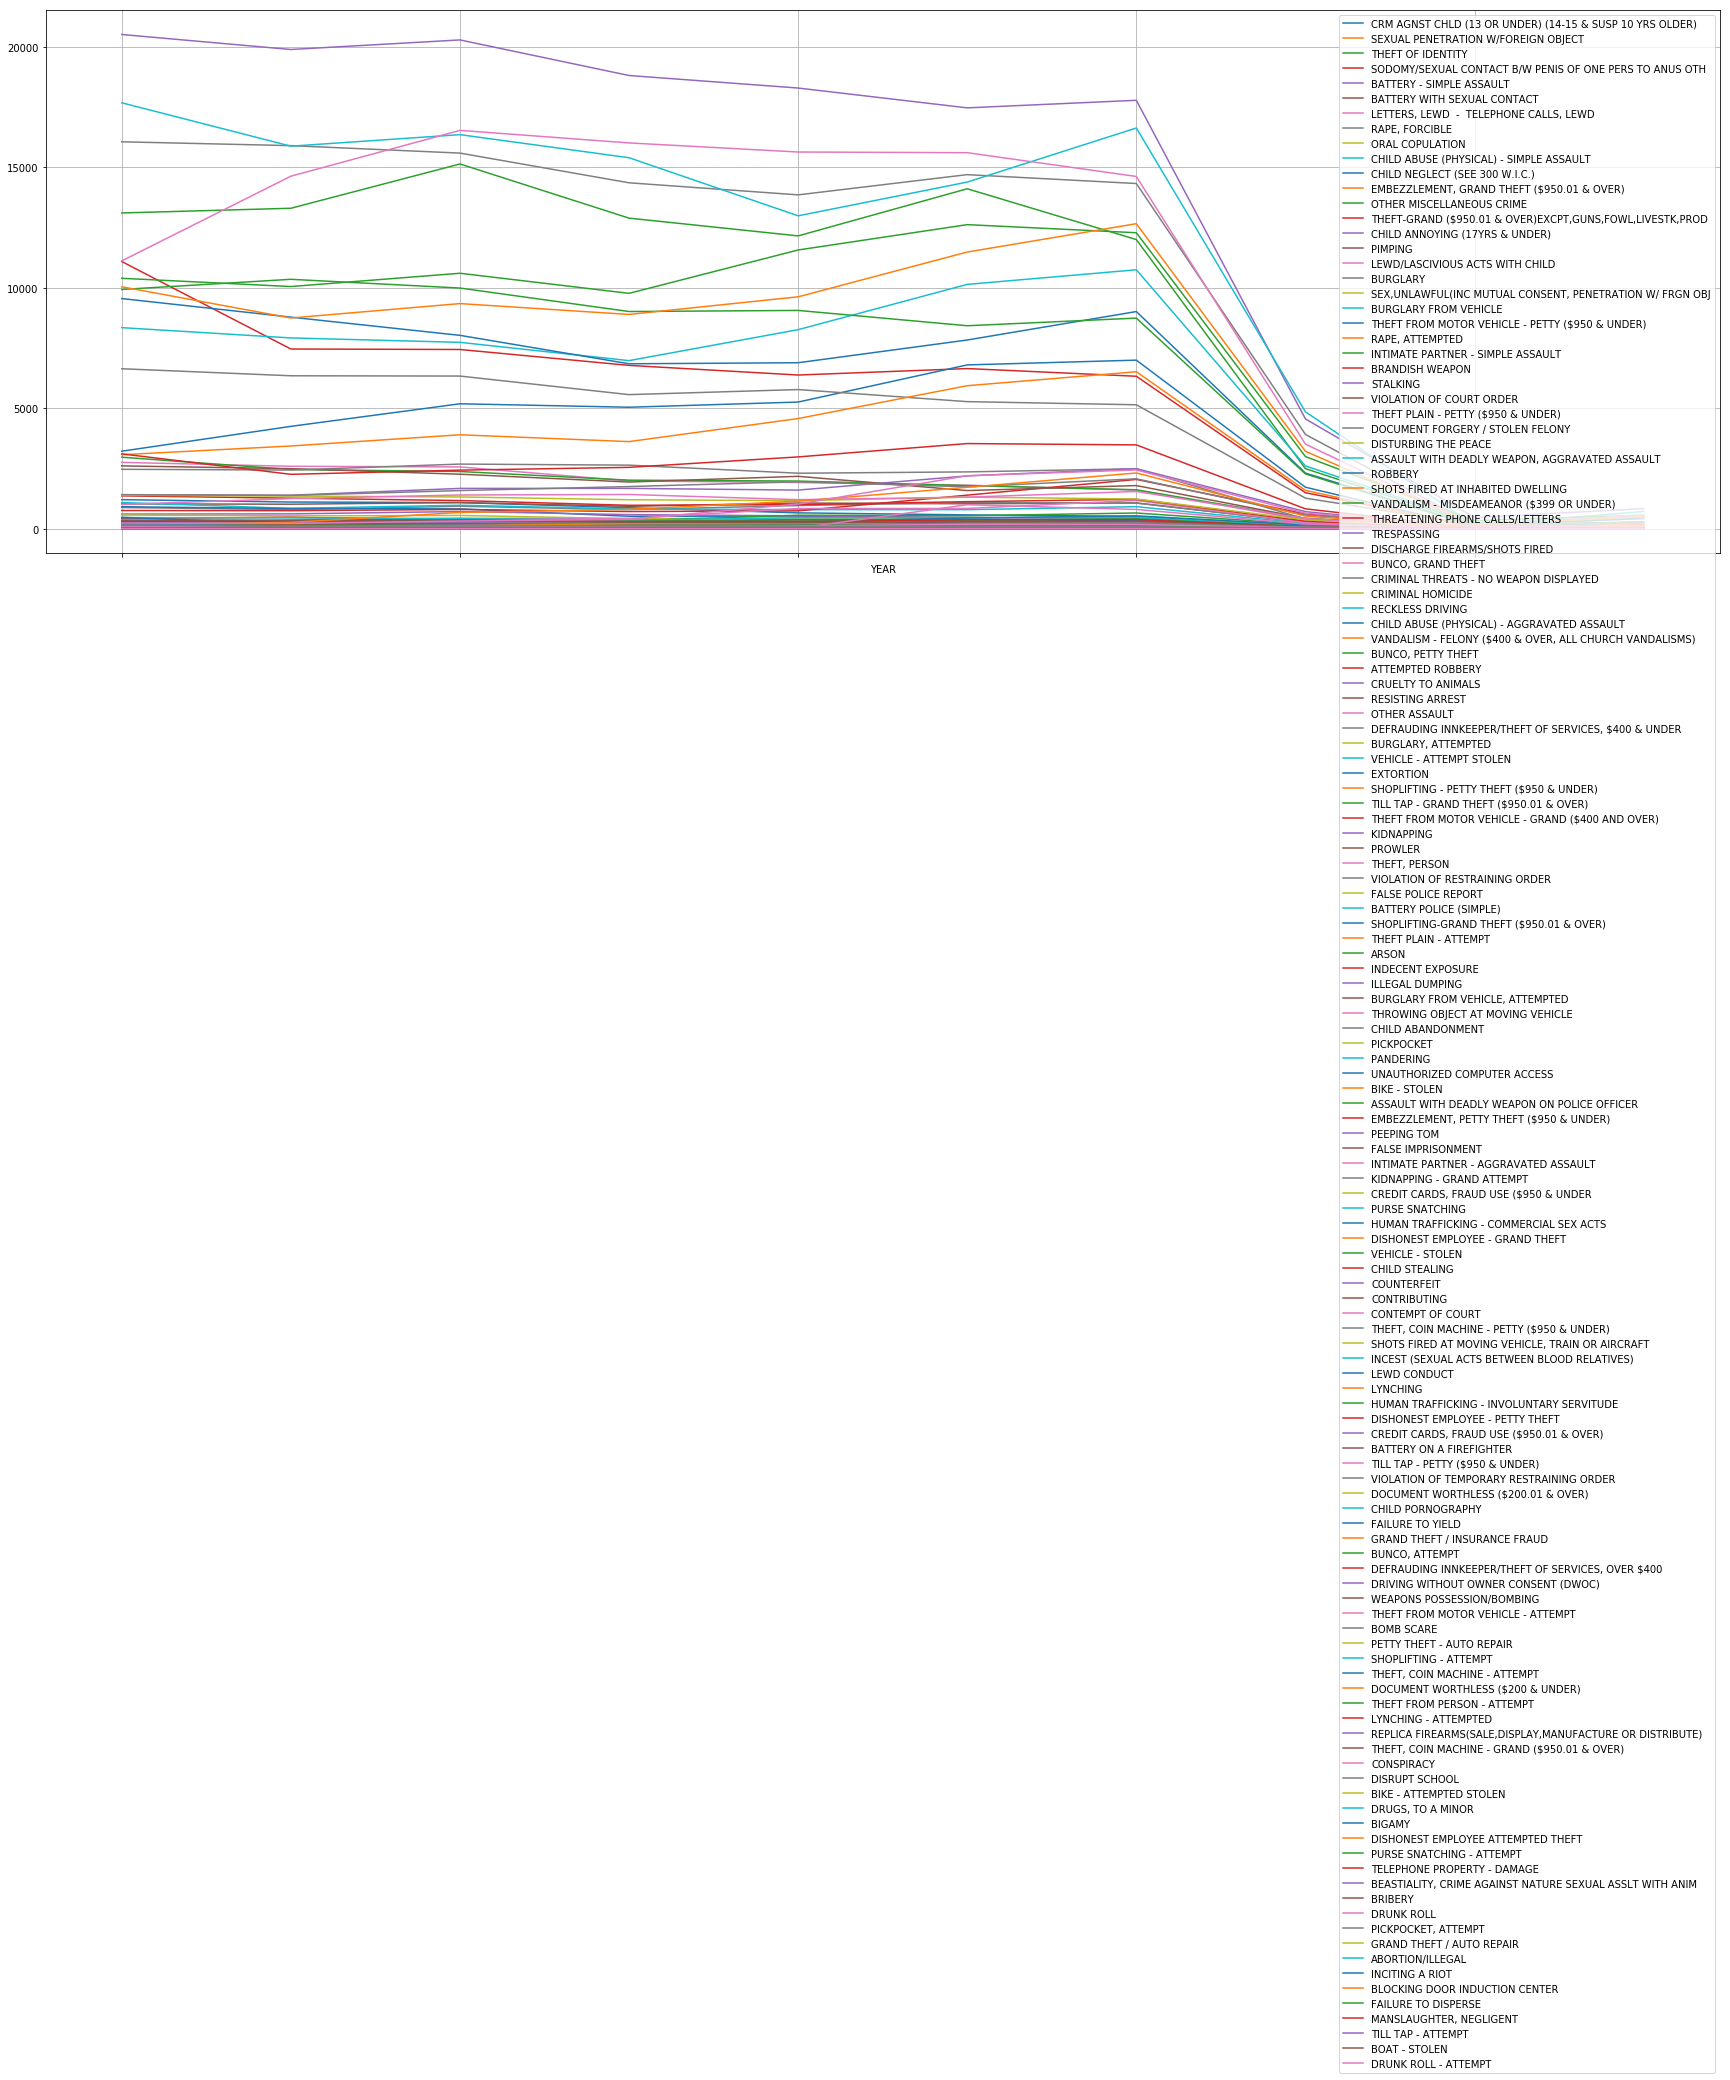

In [73]:
yearly_crime.plot(x='YEAR', y=crime_type, figsize=(30,10), grid=True)